# Лекция №5: Математическая статистика в python. Нетология.

# Кейс-стади -2.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
%matplotlib inline

# Байесовский метод решения классификационной проблемы.

Лучшим другом аналитика данных является теорема Байеса4, которая позволяет "переставить" условные вероятности местами. Пусть нужно узнать вероятность не коего события E, зависящего от наступления некоего другого события F, причем в наличии имеется лишь информация о вероятности события F, зависящего от наступления события E. Двукратное применение (в силу симметрии) определения условной вероятности даст формулу Байеса:


$$ P(A\mid B) = \frac{P(B\mid A) P(A)}{P(B)}$$

где $P(A\mid B)$ - вероятность наступления события A при условии наличия события B


Если событие B разложить на два взаимоисключающих события B при условии A и B при условии $\bar{E}$, то событие P(B) можно представить как сумма вероятностей наступления событий $P(B\mid A)$ и  $P(B\mid \bar{A})$, тогда формула вероятности примет вид:

$$P(A\mid B) = \frac{P(B\mid A) P(A)}{P(B\mid A)P(A) + P(B\mid \bar{A})P(\bar{A})}$$


Если события независимы:

$$P(A\mid B) = P(A)P(B)$$

Если события зависимы, и при этом вероятность B не равна нулю, то 

$$P(A\mid B) = \frac{P(A, B) }{P(B)}$$


Под этим подразумевается вероятность наступления события A при условии, что известно о наступлении события B.

В случае независимости двух переменных формула принимает вид:

$$P(A\mid B) = P(A)$$


означает, что наличие наступления события B не дает нам никакой информации о наступлении события A

# Задача. 
**Определить есть ли болезнь сердца у пациента с определенными показателями.**

Датасет больных сердечно-сосудистыми заболеваниями

Источник: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [ ]:
Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [2]:
url="http://yustiks.ru/dataset/cardio_train.csv"
data=pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Сколько человек в таблице всего:

In [3]:
len(data.id.unique())

70000

# Визуализируем несколько взаимосвязей между переменными

Взаимосвязь между переменной weight и ap_hi {Systolic blood pressure}

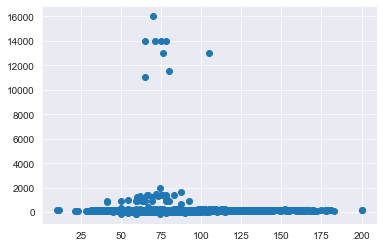

In [4]:
plt.scatter(data.weight, data.ap_hi)
plt.show()

Визуализируем взаимосвязь между  weight и ap_lo {Diastolic blood pressure}

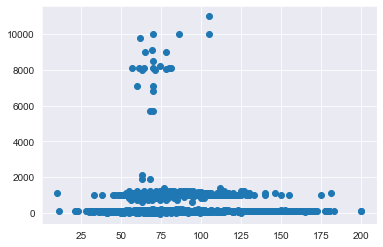

In [5]:
plt.scatter(data.weight, data.ap_lo)
plt.show()

Визуализируем зависимость между ap_hi {Systolic blood pressure} и ap_lo {Diastolic blood pressure}

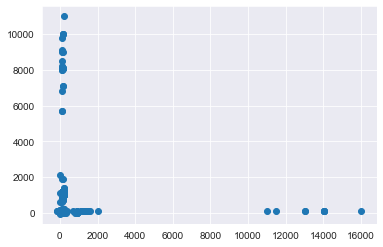

In [6]:
plt.scatter(data.ap_hi, data.ap_lo)
plt.show()

# С использованием t-test статистики проверим взаимосвязи между несколькими переменными

Как тестировать две переменные, как посчитать степени свободы: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

# Метод 1

In [7]:
stats.ttest_ind(data.weight, data.age)

Ttest_indResult(statistic=-2079.746249421458, pvalue=0.0)

p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами. 

# Метод 2

Библиотека researchpy: pip install researchpy

In [8]:
import researchpy as rp
# Showing descriptive statistics from researchpy.summary_cont()
rp.summary_cont(data.groupby('cardio')['gender'])

,N,Mean,SD,SE,95% Conf.,Interval
cardio,,,,,,
0,35021,1.345707,0.475605,0.002541,1.340726,1.350688
1,34979,1.353441,0.478045,0.002556,1.348431,1.358451


N - количество элементов
Mean - среднее значение
SD - стандартное отклонение
SE - стандартная ошибка (https://ru.wikipedia.org/wiki/Стандартная_ошибка)

Функция для подсчета t-test: https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [9]:
descriptives, results = rp.ttest(data.cardio, data.weight)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cardio,70000.0,0.499700,0.500003,0.001890,0.495996,0.503404
1,weight,70000.0,74.205690,14.395757,0.054411,74.099045,74.312335
2,combined,140000.0,37.352695,38.234750,0.102187,37.152411,37.552979


In [10]:
results

,Independent t-test,results
0,Difference (cardio - weight) =,-73.7060
1,Degrees of freedom =,139998.0000
2,t =,-1353.8031
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-7.2364
7,Hedge's g =,-7.2363
8,Glass's delta =,-147.4110
9,r =,0.9639


p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами. 

In [ ]:
Difference (cardio - weight) = разница между средними двух атрибутов
Degrees of freedom = степени свободы для двух атрибутов
t = t-value
Two side test p value =	pvalue
Difference < 0 p value = pvalue для гипотезы, что разницы между двумя переменными отсутствует
Difference > 0 p value = pvalue для гипотезы, что разница между двумя переменными есть
Cohen's d = https://researchpy.readthedocs.io/en/latest/ttest_documentation.html#cohen-s-dz-within-subject-design
Hedge's g = https://researchpy.readthedocs.io/en/latest/ttest_documentation.html#hedges-s-gs-between-subjects-design
Glass's delta = https://researchpy.readthedocs.io/en/latest/ttest_documentation.html#glass-s-delta-between-or-within-subjects-design
r = коэффициент корреляции Пирсона

In [12]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Протестируем гипотезу, что женщины болеют чаще чем мужчины

In [13]:
female = data[data['gender']==1].cardio
male = data[data['gender']==2].cardio

In [14]:
descriptives, results = rp.ttest(female, male)

Напечатаем результат:

In [15]:
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  45530.0  0.496727  0.499995  0.002343   0.492135  0.501320
1    cardio  24470.0  0.505231  0.499983  0.003196   0.498966  0.511496
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
_______________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =      -0.0085
1            Degrees of freedom =   69998.0000
2                             t =      -2.1456
3         Two side test p value =       0.0319
4        Difference < 0 p value =       0.0160
5        Difference > 0 p value =       0.9840
6                     Cohen's d =      -0.0170
7                     Hedge's g =      -0.0170
8                 Glass's delta =      -0.0170
9                             r =       0.0081


Можно заметить, что есть разница между женщинами и мужчинами (pvalue<0.05). Возможно это связано с тем, что женщин в выборке в 2 раза больше чем мужчин.

# Проверим гипотезу о том, что люди с показателем cholesterol = 2 болеют чаще

In [16]:
chol_2 = data[data['cholesterol']==2].cardio
chol_all = data[data['cholesterol']!=2].cardio

In [17]:
descriptives, results = rp.ttest(chol_2, chol_all)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio   9549.0  0.602157  0.489478  0.005009   0.592339  0.611976
1    cardio  60451.0  0.483516  0.499732  0.002033   0.479532  0.487499
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
_____________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.1186
1            Degrees of freedom =   69998.0000
2                             t =      21.6191
3         Two side test p value =       0.0000
4        Difference < 0 p value =       1.0000
5        Difference > 0 p value =       0.0000
6                     Cohen's d =       0.2381
7                     Hedge's g =       0.2381
8                 Glass's delta =       0.2424
9                             r =       0.0814


Difference < 0 p value = 1.0000, то отличие людей с показателем chol = 2 не значительное

Значит, люди с показателем chol=2 не болеют чаще, чем остальные 

# Проверим гипотезу о том, что люди, которые курят, болеют чаще сердечной болезнью

In [18]:
smoke = data[data['smoke']==1].cardio
no_smoke = data[data['smoke']==0].cardio
descriptives, results = rp.ttest(smoke, no_smoke)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio   6169.0  0.474793  0.499405  0.006358   0.462329  0.487258
1    cardio  63831.0  0.502107  0.499999  0.001979   0.498228  0.505986
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
_____________________________
                Independent t-test     results
0  Difference (cardio - cardio) =      -0.0273
1            Degrees of freedom =   69998.0000
2                             t =      -4.0976
3         Two side test p value =       0.0000
4        Difference < 0 p value =       0.0000
5        Difference > 0 p value =       1.0000
6                     Cohen's d =      -0.0546
7                     Hedge's g =      -0.0546
8                 Glass's delta =      -0.0547
9                             r =       0.0155


Difference > 0 p value = 1.0000, значит, различие в двух выборках значительное.  Среднее значение по атрибуту cardio у курящих 0.47, среднее значение среди некурящих 0.50, скорее связано с тем, что выборки имеют разное количество элементов

# ROC-кривая

ROC-кривая (англ. receiver operating characteristic, рабочая характеристика приёмника) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

Также известна как кривая ошибок. Анализ классификаций с применением ROC-кривых называется ROC-анализом.

Количественную интерпретацию ROC даёт показатель AUC (англ. area under ROC curve, площадь под ROC-кривой) — площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. Чем выше показатель AUC, тем качественнее классификатор, при этом значение 0,5 демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). Значение менее 0,5 говорит, что классификатор действует с точностью до наоборот: если положительные назвать отрицательными и наоборот, классификатор будет работать лучше.

# Задача: написать модель, предсказывающую наличие болезни по параметрам, заданным в таблице

In [19]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [53]:
x, y = data.drop(['id', 'cardio'], axis=1), data.cardio

In [54]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_norm,y, test_size = 0.2, random_state = 42)

Используем модель **Наивный Байес**

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("the accuracy of our model: {}".format(nb.score(x_test,y_test)))

the accuracy of our model: 0.5932857142857143


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68      6988
           1       0.71      0.32      0.44      7012

    accuracy                           0.59     14000
   macro avg       0.64      0.59      0.56     14000
weighted avg       0.64      0.59      0.56     14000



Очень низкий recall - это может быть связано с **несбалансированностью классов**. Сравним модель **Наивного Байеса** с моделью **Random Forest**:

In [61]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Модель Random Forest дает лучше результат

In [62]:
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



Построим кривую ROC (**кривую ошибок**) для класса болеющих и не болеющих людей.

Установить библиотеку для кривой ROC: pip install scikit-plot

/Users/yustinaivanova/venv/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


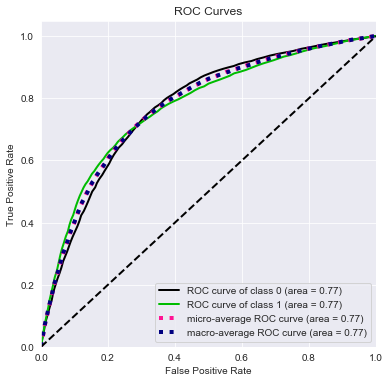

In [63]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test

y_probas = model.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_true, y_probas, figsize=(6, 6))
plt.show()

Есть модель Random Forest, точность которой 70%. Наша задача - подобрать такой threshold для идентифицирования, что человек болен, что False Positive Rate будет не больше 0.2

Четыре возможных выхода могут быть сформулированы и оформлены в виде **таблицы сопряжённости размера 2×2**.

Тогда значение Sen=TP/(TP+FN), способность алгоритма «видеть» больных, называется чувствительность, Spe=TN/(TN+FP) — специфичность, способность алгоритма не принимать здоровых за больных. Экономический эффект от этих ошибок разный: ложно-отрицательный больной придёт с запущенной болезнью, на дообследование ложно-положительного будут потрачены ресурсы.

Пробежимся порогом от −∞ до ∞ и нанесём на график соответствующие X=1−Spe и Y=Sen — это и будет ROC-кривая. Когда порог −∞, классификатор считает всех больными, Sen=1, 1−Spe=1. Когда +∞ — все «здоровые», Sen=0, 1−Spe=0. Так что ROC-кривая всегда идёт от (0,0) до (1,1).

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Receiver_Operating_Characteristic.png/600px-Receiver_Operating_Characteristic.png)

Text(0, 0.5, 'TPR')

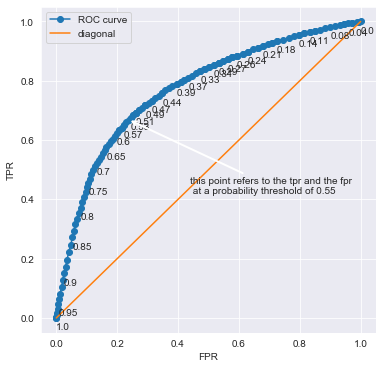

In [64]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas[:, 1])

# %%
plt.subplots(figsize=(6, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[1::5], tpr[1::5], thresholds[1::5]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
rnd_idx = 1 * len(tpr)//3
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)), 
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

# Определение СПАМа в тексте

Датасет для определения СПАМа в тексте.  https://www.kaggle.com/team-ai/spam-text-message-classification

In [64]:
url='http://yustiks.ru/dataset/SPAM_text.csv'
data=pd.read_csv(url) 
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
print(data.loc[2, 'Message'])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


Создадим новый атрибут Category, где будем указывать, что если данный текст является СПАМом, то 1, если не является, то 0

In [66]:
data["Category"] = [1 if each == "spam" else 0 for each in data["Category"]]

In [67]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Как на основе текста предсказать, что он является СПАМом? 

# Словарь BAG-of-words. 

Создаем слова. На основе слов пишем для каждого текста словарь, где каждое слово - это ключ, а значение ключа - это сколько раз встречается данное слова в данном тексте.

Как пример: рассмотрим 1 строку из датасета.



*   Удалим все символы, не являющимися латинскими буквами
*   Заглавные буквы меняем на строчные
*   Разделим текст на слова
*   В каждом слове выделяем корень слова
*   Создаем список всех слов



In [69]:
import re
nlp_data = str(data.loc[2, 'Message'])
print(nlp_data)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


Удаление всех не латинских букв:

In [70]:
nlp_data = re.sub("[^a-zA-Z]"," ",nlp_data)
print(nlp_data)

Free entry in   a wkly comp to win FA Cup final tkts   st May       Text FA to       to receive entry question std txt rate T C s apply            over   s


Во всех словах заглавные буквы меняем на строчные

In [71]:
nlp_data = nlp_data.lower()
print(nlp_data)

free entry in   a wkly comp to win fa cup final tkts   st may       text fa to       to receive entry question std txt rate t c s apply            over   s


Переводим текст в отдельные слова

In [72]:
import nltk as nlp # библиотека nltk -> pip install nltk 
nlp.download('punkt')
nlp_data = nlp.word_tokenize(nlp_data)
print(nlp_data)

['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yustinaivanova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ищем корень каждого слова

In [73]:
nlp.download('wordnet')
lemma = nlp.WordNetLemmatizer()
nlp_data = [lemma.lemmatize(word) for word in nlp_data]
print(nlp_data)

['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yustinaivanova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Добавляем все найденные слова в список

In [74]:
nlp_data = " ".join(nlp_data)

In [75]:
description_list = []
for description in data["Message"]:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()
    description = nlp.word_tokenize(description)
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

Сколько всего получилось слов в словаре мешка слов:

In [76]:
len(description_list)

5572

In [77]:
print(description_list[0])

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat


Создаем bag-of-words, для этого выбираем 3000 максимально встречаемых слов

In [78]:
from sklearn.feature_extraction.text import CountVectorizer 
max_features = 3000
count_vectorizer = CountVectorizer(max_features = max_features, stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()
print("Самые часто встречаемые {} слов: {}".format(max_features,count_vectorizer.get_feature_names()))

Самые часто встречаемые 3000 слов: ['aah', 'aathi', 'abi', 'ability', 'abiola', 'abj', 'able', 'absolutly', 'abt', 'abta', 'aburo', 'ac', 'academic', 'acc', 'accept', 'access', 'accident', 'accidentally', 'accordingly', 'account', 'ache', 'acl', 'aco', 'acted', 'acting', 'action', 'activate', 'active', 'activity', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'address', 'admin', 'administrator', 'admirer', 'admit', 'adore', 'adoring', 'adult', 'advance', 'adventure', 'advice', 'advise', 'ae', 'aeronautics', 'aeroplane', 'affair', 'affection', 'afraid', 'aft', 'afternoon', 'aftr', 'ag', 'agalla', 'age', 'agent', 'ago', 'agree', 'ah', 'aha', 'ahead', 'ahmad', 'aid', 'aight', 'ain', 'aint', 'air', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'aj', 'aka', 'al', 'alaipayuthe', 'album', 'alcohol', 'alert', 'alex', 'alfie', 'algarve', 'ali', 'alive', 'allah', 'allow', 'allowed', 'alright', 'alrite', 'alwys', 'amazing', 'american', 'amp

Чаще всего во всех сообщениях встречается слово 'crazy'

In [79]:
list_names = count_vectorizer.get_feature_names()
for i in range(len(list_names)):
  if list_names[i] == 'crazy':
    print(i)

592


Исходные данные преобразуем в bag-of-words формат

In [80]:
sparce_matrix[0, 592]

1

In [81]:
print(len(sparce_matrix[0,: ]))


3000


In [82]:
y = data.iloc[:,0].values
x = sparce_matrix

Делим данные на тренировочные и тестовые

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

Напишем **наивный байесовский классификатор**

In [85]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("the accuracy of our model: {}".format(nb.score(x_test,y_test)))

the accuracy of our model: 0.8753363228699551


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       966
           1       0.52      0.89      0.66       149

    accuracy                           0.88      1115
   macro avg       0.75      0.88      0.79      1115
weighted avg       0.92      0.88      0.89      1115



Напишем логистическую регрессию

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 200)
lr.fit(x_train,y_train)
print("our accuracy is: {}".format(lr.score(x_test,y_test)))

our accuracy is: 0.9820627802690582


In [88]:
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Классификатор по методу ближайшего соседа

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.9399103139013453


In [90]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       1.00      0.55      0.71       149

    accuracy                           0.94      1115
   macro avg       0.97      0.78      0.84      1115
weighted avg       0.94      0.94      0.93      1115



Из всех выбранных моделей лучше всего дала результаты модель логистической регрессии.

# Анализ текста на тональность

Рассмотрим датасет twitter sentiment analyses hatred speach https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech#train.csv

In [91]:
url='http://yustiks.ru/dataset/twitter_train.csv'
data=pd.read_csv(url)
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [92]:
len(data)

31962

Есть колонка **label** - класс 1 означает, что текст содержит в себе **ненависть и расизм**. 0 - **текст нейтрален по теме**.

# Задача - определить класс, к которому относится тот или иной текст

Удаляем слова, которые не имеют смысловой нагрузки (например, слова 'и', 'или', 'а' и другие)

In [93]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
import string
import re
stop_words = set(stopwords.words('english'))


def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return " ".join(filtered_sentence)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yustinaivanova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Далее функция, с помощью которой мы будем обрабатывать твиты


*   переводим все слова в строчные буквы
*   удаляем цифры
*   удаляем пунктуацию
*   удаляем стоп-слова



In [94]:
def preprocess(line):
  # все слова переводим в строчный текст
    line = line.lower()
  # удаляем цифры
    line = re.sub(r'\d+', '', line)
  # удаляем пунктуацию
    line = line.translate(line.maketrans("","", string.punctuation))
    line = remove_stopwords(line)
    return line


Предобработка всех твитов из таблицы

In [95]:
train = data

for i,line in enumerate(train.tweet):
    train.tweet[i] = preprocess(line)

/Users/yustinaivanova/venv/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Разделим датасет на тренировочный и тестовый

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['tweet'], train['label'], test_size=0.5, stratify=train['label'])

trainp=train[train.label==1]
trainn=train[train.label==0]
print(trainp.info())
trainn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 13 to 31960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2242 non-null   int64 
 1   label   2242 non-null   int64 
 2   tweet   2242 non-null   object
dtypes: int64(2), object(1)
memory usage: 70.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29720 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29720 non-null  int64 
 1   label   29720 non-null  int64 
 2   tweet   29720 non-null  object
dtypes: int64(2), object(1)
memory usage: 928.8+ KB


Можно заметить, что классы **несбалансированы**: в классе 1 2242 элемента, а в классе 0 их 29720. 

Создадим bag-of-words вектора для всех твитов

In [97]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tf_train=vect.fit_transform(X_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(X_test)  #get same encodings on test data as of vocabulary built

Создадим модель **Наивный байес**

In [98]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

Обучим модель

In [99]:
model.fit(X=tf_train,y=y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Посмотрим качество модели

In [100]:
expected = y_test
predicted=model.predict(tf_test)
from sklearn import metrics

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14860
           1       0.87      0.45      0.59      1121

    accuracy                           0.96     15981
   macro avg       0.92      0.72      0.78     15981
weighted avg       0.95      0.96      0.95     15981

[[14787    73]
 [  620   501]]


Можно заметить, что класс 1 предсказывается намного хуже, чем класс 0: класса 1 намного меньше по числу элементов, чем класс 0.

Сбалансируем датасет

In [101]:
train_imbalanced = train
from sklearn.utils import resample
df_majority = train[train.label==0]
df_minority = train[train.label==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print("Before")
print(train.label.value_counts())
print("After")
print(df_upsampled.label.value_counts())

X_train, X_test, y_train, y_test = train_test_split(df_upsampled['tweet'], df_upsampled['label'], test_size=0.5, stratify=df_upsampled['label'])

Before
0    29720
1     2242
Name: label, dtype: int64
After
1    29720
0    29720
Name: label, dtype: int64


Можно заметить, что тренировочных данных стало больше, и классы уравнялись в количестве.

In [102]:
tf_train=vect.transform(X_train)
tf_test=vect.transform(X_test)
model.fit(X=tf_train,y=y_train)
expected = y_test
predicted=model.predict(tf_test)
from sklearn import metrics

print(metrics.classification_report(expected, predicted))
print('Матрица confusion')
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     14860
           1       0.92      0.97      0.94     14860

    accuracy                           0.94     29720
   macro avg       0.94      0.94      0.94     29720
weighted avg       0.94      0.94      0.94     29720

Матрица confusion
[[13570  1290]
 [  454 14406]]


Можно заметить, что балансировка привела к улучшению результата.